Example 9.1: Apply the Numerov algorithm to the Simple Harmonic Oscillator problem:

$ \frac{ \mathrm{d}^2 y } {\mathrm{d}x^2} = - 4 \pi^2 y$, with $y(0)=1$, $y'(0)=0$. 

Integrate from $x=0$ to $x=4$. Note that you will have to use some special procedure to generate the value of $y_1 \equiv y(h)$, needed to start the three-term recursion relation.

Plot the resulting function $y(x)$. 

Solution:

To find $y_1 = y(h)$, we Taylor-expand $y(x)$ about the origin by an amount $h$:

$y(h) = y(0) + h y'(0) = 1$

so we have: $y_0 = y(0) = 1$ and $y_1 = 1$.

Let's now implement the algorithm and integrate the equation. 

The "forward"-moving algorithm follows the recursion relation:

$y_{n+1} = \frac{ 2\left[1 - \frac{5}{12} h^2 k^2_n \right] y_n - \left[1 + \frac{h^2}{12} k^2_{n-1} \right] y_{n-1} + \frac{h^2}{12} \left[ S_{n+1} + 10 S_n + S_{n-1}\right] } { 1+\frac{h^2}{12} k^2_{n+1} }$.

In this case, there is no "source" term, $S(x) = 0 \forall x$, so we can omit the $S$-related terms.

In [62]:
import numpy as np

# Numerov's algorithm (forward)
# takes as input the initial conditions y(0) and y'(0) as y0 and yp0
# h is the step size, the k-squared term (k2), the S term -- these are FUNCTIONS!
# the initial value of the independent variable x0, and the final value xf
# returns t,y as the solution arrays
def Numerov(k2, S, y0, yp0, h, x0, xf):
    """Returns the solution to a 2nd-order ODEs of the type: y'' + k^2 y = S(x) via the Numerov algorithm"""
    # the number of steps:
    N = int( (xf-x0)/h ) # needs to be an integer
    # get y1 via Taylor series:
    y1 = y0 + h * yp0
    # define the numpy arrays to return
    ya = np.zeros(N+1)
    xa = np.zeros(N+1)
    # set the first two values of the arrays:
    ya[0] = y0
    ya[1] = y1
    xa[0] = x0
    xa[1] = x0 + h
    # integrate via the Numerov algo:
    for n in range(1,N):
        x = x0 + n*h
        xa[n]=x
        h2dt = h**2/12 # appears often so let's just calculate it once!
        ya[n+1] = (2 * (1 - 5*h2dt * k2(x)) * ya[n] - (1 + h2dt *k2(x-h)) * ya[n-1] + h2dt*(S(x+h) + 10 * S(x) + S(x-h)))/((1 + h2dt * k2(x+h) ))    
    xa[N] = xf # set the last x value which is not set in the loop
    return xa,ya


# Implement the functions specific to our equation: 
def k2func(x):
    """The k-squared function corresponding to the differential equation"""
    return 4 * np.pi**2

def Sfunc(x):
    """The source term S(x) corresponding to the differential equation"""
    return 0


# SOLVE the equation:
# Set the initial conditions 
x0 = 0
y0 = 1
yp0 = 0
# the step size
h = 1E-2
# final point:
xf = 4

# Call the function:
xsol, ysol = Numerov(k2func, Sfunc, y0, yp0, h, x0, xf)

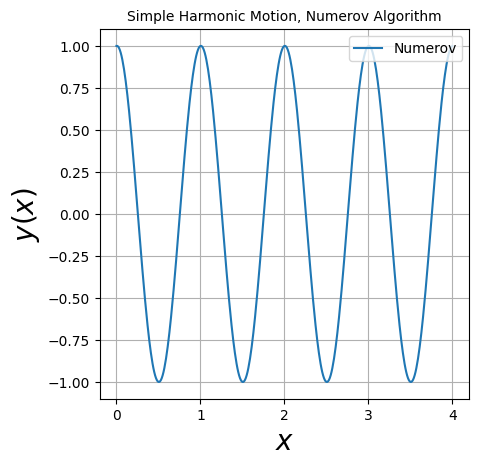

In [65]:
# Let's plot to check the algo: 

import matplotlib.pyplot as plt # import matplotlib, a conventional module name is plt
import numpy as np

fig, ax = plt.subplots() # create the elements required for matplotlib. This creates a figure containing a single axes.

# set the labels and titles:
ax.set_xlabel(r'$x$', fontsize=20) # set the x label
ax.set_ylabel(r'$y(x)$', fontsize=20) # set the y label. Note that the 'r' is necessary to remove the need for double slashes. You can use LaTeX! 
ax.set_title('Simple Harmonic Motion, Numerov Algorithm', fontsize=10) # set the title 

# make a one-dimensional plot using the above arrays, add a custom label
ax.plot(xsol, ysol, label='Numerov') 

# set the ticks
ax.set_xticks(range(5))
ax.grid()
ax.set_aspect(2)

# construct the legend:
ax.legend(loc='upper right')  # Add a legend

plt.show() # show the plot here